Columns after pivot: ['year', 'month', 0, 1]
Pivot shape: (63, 4)

Explained Variance Ratio:
PC1    0.999969
PC2    0.000031
dtype: float64

Component Loadings (first 5 features × first 5 PCs):
        PC1       PC2
0  0.707107  0.707107
1  0.707107 -0.707107

Top 10 contributors to PC1:
0    0.707107
1    0.707107
Name: PC1, dtype: float64


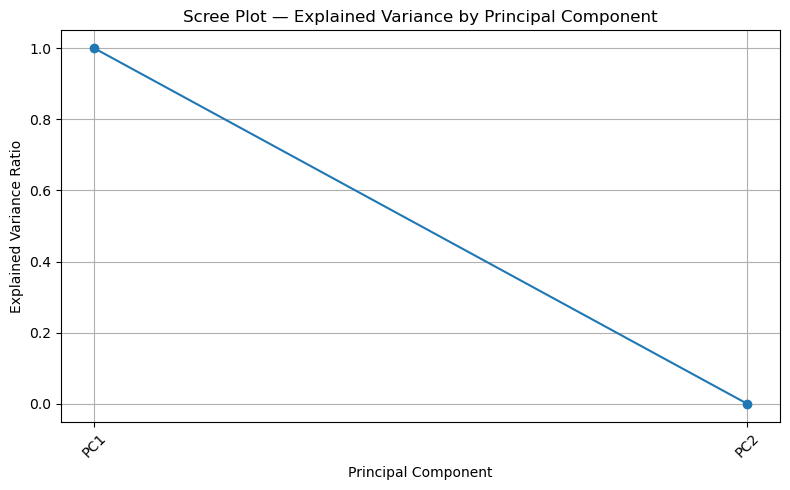

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Filter out suppressed rows
df_filtered = df.loc[~df['count_is_suppressed'].astype(bool)]

# 2. Pivot so each race-age group is its own column
df_pivot = df_filtered.pivot_table(
    index=['year', 'month'],
    columns='group_Race and Age',
    values='count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Quick sanity check
print("Columns after pivot:", df_pivot.columns.tolist())
print("Pivot shape:", df_pivot.shape)

# 3. Identify the subgroup feature columns
subgroup_cols = [c for c in df_pivot.columns if c not in ['year', 'month']]
X = df_pivot[subgroup_cols].values

# 4. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Fit PCA
pca = PCA(n_components=len(subgroup_cols))
X_pca = pca.fit_transform(X_scaled)

# 6. Compute explained variance ratios
evr = pd.Series(
    pca.explained_variance_ratio_,
    index=[f'PC{i}' for i in range(1, len(subgroup_cols) + 1)]
)
print("\nExplained Variance Ratio:")
print(evr)

# 7. Build a loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    index=subgroup_cols,
    columns=evr.index
)
print("\nComponent Loadings (first 5 features × first 5 PCs):")
print(loadings.iloc[:5, :5])

# 8. Top 10 contributors to PC1
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
print("\nTop 10 contributors to PC1:")
print(top_pc1)

# 9. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(
    np.arange(1, len(evr) + 1),
    evr.values,
    marker='o', linestyle='-'
)
plt.xticks(np.arange(1, len(evr) + 1), evr.index, rotation=45)
plt.title('Scree Plot — Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

